# Recipe for Rating: Predict Food Ratings using ML
Building models that can predict the ratings for each recipe using this information.
This problem is a multi-class classification in supervised learning.
We will use XGBClassifier and RandomForestClassifier for better accuracy.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')

In [3]:
test_set['Rating']=np.nan

In [4]:
dataset=pd.concat([train_set,test_set]) # train and test so we can perform same data transformation on both.

In [5]:
dataset.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5.0,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5.0,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3.0,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5.0,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4.0,100,Great basic recipe. I added 2 teaspoons Tuscan...


# Feature  engineering  
selecting, manipulating and transforming raw data into features  so that can be used in  our model.

In [6]:
dataset.nunique()

ID                     725
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            18182
UserID               13812
UserName             13586
UserReputation          22
CreationTimestamp     2695
ReplyCount               4
ThumbsUpCount           62
ThumbsDownCount         58
Rating                   6
BestScore              588
Recipe_Review        17731
dtype: int64

In [7]:
dataset.isnull().sum()

ID                      0
RecipeNumber            0
RecipeCode              0
RecipeName              0
CommentID               0
UserID                  0
UserName                0
UserReputation          0
CreationTimestamp       0
ReplyCount              0
ThumbsUpCount           0
ThumbsDownCount         0
Rating               4546
BestScore               0
Recipe_Review           2
dtype: int64

In [8]:
dataset.RecipeName.head(50)

0                Banana Bars with Cream Cheese Frosting
1                                      Simple Taco Soup
2                                     Cheeseburger Soup
3                             Grilled Huli Huli Chicken
4                                      Cauliflower Soup
5                               Favorite Chicken Potpie
6                                   Fluffy Key Lime Pie
7                                       Seafood Lasagna
8                                    Cheesy Ham Chowder
9                                     Cheeseburger Soup
10                        First-Place Coconut Macaroons
11                                 Rhubarb Custard Bars
12                               Garlic Beef Enchiladas
13                   Pork Chops with Scalloped Potatoes
14                                      Seafood Lasagna
15                         Peanut Butter Cup Cheesecake
16                             Li’l Cheddar Meat Loaves
17                               Chicken Wild Ri

In [9]:
dataset.RecipeName.unique().tolist()

['Banana Bars with Cream Cheese Frosting',
 'Simple Taco Soup',
 'Cheeseburger Soup',
 'Grilled Huli Huli Chicken',
 'Cauliflower Soup',
 'Favorite Chicken Potpie',
 'Fluffy Key Lime Pie',
 'Seafood Lasagna',
 'Cheesy Ham Chowder',
 'First-Place Coconut Macaroons',
 'Rhubarb Custard Bars',
 'Garlic Beef Enchiladas',
 'Pork Chops with Scalloped Potatoes',
 'Peanut Butter Cup Cheesecake',
 'Li’l Cheddar Meat Loaves',
 'Chicken Wild Rice Soup',
 'Flavorful Chicken Fajitas',
 'Enchilada Casser-Ole!',
 'Creamy White Chili',
 'Stuffed Pepper Soup',
 'Lemon Blueberry Bread',
 'Chicken and Dumplings',
 'Porcupine Meatballs',
 'Simple Au Gratin Potatoes',
 'Basic Homemade Bread',
 'Zucchini Cupcake',
 'Forgotten Jambalaya',
 'Ravioli Lasagna',
 'Contest-Winning New England Clam Chowder',
 'Basic Banana Muffins',
 'Creamy Grape Salad',
 'Big Soft Ginger Cookies',
 'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
 'Shrimp Scampi',
 'Chocolate-Strawberry Celebration Cake',
 'Easy Peanut Butter

In [10]:
# split the comment features into 5 parts based on the delimiter "_"
dataset['CommentID0']=dataset.CommentID.apply(lambda x: x.split('_')[0])
dataset['CommentID1']=dataset.CommentID.apply(lambda x: x.split('_')[1])
dataset['CommentID2']=dataset.CommentID.apply(lambda x: x.split('_')[2])
dataset['CommentID3']=dataset.CommentID.apply(lambda x: x.split('_')[3])
dataset['CommentID4']=dataset.CommentID.apply(lambda x: x.split('_')[4])


In [11]:
dataset.CommentID0.unique() 

array(['sp'], dtype=object)

In [12]:
dataset.CommentID1.unique()

array(['aUSaElGf'], dtype=object)

In [13]:
dataset.CommentID2.unique()

array(['12259', '8202', '2832', '100276', '19731', '21444', '36450',
       '17310', '12734', '4383', '8431', '10248', '1152', '27675',
       '10252', '16579', '12540', '42083', '14299', '2872', '414',
       '24886', '1324', '18345', '32480', '7178', '39549', '18274',
       '41095', '7708', '32535', '12700', '42386', '28058', '46655',
       '8015', '3290', '3058', '39545', '12347', '4444', '386', '3683',
       '19201', '42873', '35766', '6086', '9010', '17826', '32264',
       '1196', '33206', '11588', '38183', '2912', '3309', '31278',
       '39334', '45495', '33121', '9735', '957', '15805', '41101',
       '41384', '34347', '9739', '14600', '38550', '1063', '32248',
       '11767', '17022', '27434', '12003', '6504', '27696', '35948',
       '33743', '36217', '39581', '33457', '27626', '191775', '16458',
       '82745', '26937', '1693', '43675', '3143', '1081', '74724',
       '141947', '11330', '20170', '18341', '7752', '23222', '7539',
       '1821'], dtype=object)

In [14]:
dataset.CommentID3.unique()

array(['c'], dtype=object)

In [15]:
dataset.CommentID4.unique()

array(['149978', '310332', '206522', ..., '112060', '391682', '113484'],
      dtype=object)

In [16]:
dataset['UserID0']=dataset.UserID.apply(lambda x: x.split('_')[0])
dataset['UserID1']=dataset.UserID.apply(lambda x: x.split('_')[1])

In [17]:
dataset['UserID0_len']=dataset.UserID0.apply(lambda x: len(x))
dataset['UserID1_len']=dataset.UserID1.apply(lambda x: len(x))

In [18]:
dataset.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,...,Recipe_Review,CommentID0,CommentID1,CommentID2,CommentID3,CommentID4,UserID0,UserID1,UserID0_len,UserID1_len
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,...,great recipe! I have made them just as written...,sp,aUSaElGf,12259,c,149978,u,1oKVaBmiEKwAFyiHrDLoWpbel0J,1,27
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,...,This is an easy and quick recipe that is great...,sp,aUSaElGf,8202,c,310332,u,1oKZeRIXYzGNhGW8OMR3O4lX1ih,1,27
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,...,I think I was looking for something extra spec...,sp,aUSaElGf,2832,c,206522,u,1oKYHUtdaD48KJCDYq5wfpAUxWz,1,27
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,...,This is our favorite grilled chicken recipe. ...,sp,aUSaElGf,100276,c,434088,u,1oKZCQcKQZdQhDVBS7oISc216VA,1,27
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,...,Great basic recipe. I added 2 teaspoons Tuscan...,sp,aUSaElGf,19731,c,387011,u,1oKd4sudZQPgu6YALiC7bW7mKMs,1,27


In [19]:
dataset.UserName.unique().shape

(13586,)

In [20]:
dataset.UserReputation.unique()

array([ 20,   1,  10,  80,  30,   0,  60,  90, 160,  40, 510, 100,  50,
       140,  70, 220, 110, 130, 150, 300, 170, 520], dtype=int64)

In [21]:
dataset['Recipe_Review']=dataset.Recipe_Review.apply(lambda x : 'n' if pd.isna(x) else x)

In [22]:
dataset.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,UserID0_len,UserID1_len
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,13636.000000,18182.000000,18182.0,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288721,153.162138,1.0,26.222858
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544839,141.075316,0.0,3.324724
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,12.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000,1.0,27.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,1.0,27.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,1.0,27.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000,1.0,27.000000


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18182 entries, 0 to 4545
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18182 non-null  int64  
 1   RecipeNumber       18182 non-null  int64  
 2   RecipeCode         18182 non-null  int64  
 3   RecipeName         18182 non-null  object 
 4   CommentID          18182 non-null  object 
 5   UserID             18182 non-null  object 
 6   UserName           18182 non-null  object 
 7   UserReputation     18182 non-null  int64  
 8   CreationTimestamp  18182 non-null  int64  
 9   ReplyCount         18182 non-null  int64  
 10  ThumbsUpCount      18182 non-null  int64  
 11  ThumbsDownCount    18182 non-null  int64  
 12  Rating             13636 non-null  float64
 13  BestScore          18182 non-null  int64  
 14  Recipe_Review      18182 non-null  object 
 15  CommentID0         18182 non-null  object 
 16  CommentID1         18182 non

In [24]:
dataset.isna().sum()

ID                      0
RecipeNumber            0
RecipeCode              0
RecipeName              0
CommentID               0
UserID                  0
UserName                0
UserReputation          0
CreationTimestamp       0
ReplyCount              0
ThumbsUpCount           0
ThumbsDownCount         0
Rating               4546
BestScore               0
Recipe_Review           0
CommentID0              0
CommentID1              0
CommentID2              0
CommentID3              0
CommentID4              0
UserID0                 0
UserID1                 0
UserID0_len             0
UserID1_len             0
dtype: int64

In [25]:
dataset.nunique()

ID                     725
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            18182
UserID               13812
UserName             13586
UserReputation          22
CreationTimestamp     2695
ReplyCount               4
ThumbsUpCount           62
ThumbsDownCount         58
Rating                   6
BestScore              588
Recipe_Review        17732
CommentID0               1
CommentID1               1
CommentID2             100
CommentID3               1
CommentID4           18182
UserID0                  1
UserID1              13812
UserID0_len              1
UserID1_len              2
dtype: int64

In [26]:
dataset_copy=dataset.copy()

In [27]:
# drop all columns in which  only 1 unique value is present  or nessesary information is not present there
dataset_copy=dataset_copy.drop(['CommentID','UserID','CommentID0','CommentID1','CommentID3','CommentID4','UserID0','UserID0_len','UserID1_len'],axis=1)

In [28]:
dataset_copy.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,CommentID2,UserID1
0,70,71,12259,Banana Bars with Cream Cheese Frosting,misscoffeepot,20,1622717078,0,0,0,5.0,100,great recipe! I have made them just as written...,12259,1oKVaBmiEKwAFyiHrDLoWpbel0J
1,72,88,8202,Simple Taco Soup,MichelleMalone,1,1622717852,0,0,1,5.0,100,This is an easy and quick recipe that is great...,8202,1oKZeRIXYzGNhGW8OMR3O4lX1ih
2,458,3,2832,Cheeseburger Soup,jeannem32,1,1622717357,0,0,0,3.0,100,I think I was looking for something extra spec...,2832,1oKYHUtdaD48KJCDYq5wfpAUxWz
3,7,50,100276,Grilled Huli Huli Chicken,ds422,1,1622648899,0,0,0,5.0,100,This is our favorite grilled chicken recipe. ...,100276,1oKZCQcKQZdQhDVBS7oISc216VA
4,60,12,19731,Cauliflower Soup,SusanHoward,1,1622718260,0,0,0,4.0,100,Great basic recipe. I added 2 teaspoons Tuscan...,19731,1oKd4sudZQPgu6YALiC7bW7mKMs


In [29]:

dataset_copy['CommentID2']=dataset_copy.CommentID2.astype(np.int64)

In [30]:
dataset_copy.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,CommentID2,UserID1
0,70,71,12259,Banana Bars with Cream Cheese Frosting,misscoffeepot,20,1622717078,0,0,0,5.0,100,great recipe! I have made them just as written...,12259,1oKVaBmiEKwAFyiHrDLoWpbel0J
1,72,88,8202,Simple Taco Soup,MichelleMalone,1,1622717852,0,0,1,5.0,100,This is an easy and quick recipe that is great...,8202,1oKZeRIXYzGNhGW8OMR3O4lX1ih
2,458,3,2832,Cheeseburger Soup,jeannem32,1,1622717357,0,0,0,3.0,100,I think I was looking for something extra spec...,2832,1oKYHUtdaD48KJCDYq5wfpAUxWz
3,7,50,100276,Grilled Huli Huli Chicken,ds422,1,1622648899,0,0,0,5.0,100,This is our favorite grilled chicken recipe. ...,100276,1oKZCQcKQZdQhDVBS7oISc216VA
4,60,12,19731,Cauliflower Soup,SusanHoward,1,1622718260,0,0,0,4.0,100,Great basic recipe. I added 2 teaspoons Tuscan...,19731,1oKd4sudZQPgu6YALiC7bW7mKMs


In [31]:
dataset_copy.nunique()

ID                     725
RecipeNumber           100
RecipeCode             100
RecipeName             100
UserName             13586
UserReputation          22
CreationTimestamp     2695
ReplyCount               4
ThumbsUpCount           62
ThumbsDownCount         58
Rating                   6
BestScore              588
Recipe_Review        17732
CommentID2             100
UserID1              13812
dtype: int64

In [32]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18182 entries, 0 to 4545
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18182 non-null  int64  
 1   RecipeNumber       18182 non-null  int64  
 2   RecipeCode         18182 non-null  int64  
 3   RecipeName         18182 non-null  object 
 4   UserName           18182 non-null  object 
 5   UserReputation     18182 non-null  int64  
 6   CreationTimestamp  18182 non-null  int64  
 7   ReplyCount         18182 non-null  int64  
 8   ThumbsUpCount      18182 non-null  int64  
 9   ThumbsDownCount    18182 non-null  int64  
 10  Rating             13636 non-null  float64
 11  BestScore          18182 non-null  int64  
 12  Recipe_Review      18182 non-null  object 
 13  CommentID2         18182 non-null  int64  
 14  UserID1            18182 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 2.2+ MB


In [33]:
X=dataset_copy.drop('Rating',axis=1)

In [34]:
y=dataset_copy['Rating']

## Data transformation 
It is a part of feature engineering  here we transform the data such that it  can be used in out models.and the size of the transformation should be optimized.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
ar=[]
text=['RecipeName','Recipe_Review']
for i in text:
    ar.append(vector.fit_transform(X[i]))
    

In [36]:


from sklearn.preprocessing import OneHotEncoder  , StandardScaler 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num=X.select_dtypes(include='number').columns.tolist()
cat=['UserID1','UserName']
transformers=[
    ('S',StandardScaler(),num),
    ('hot',OneHotEncoder(),cat),
   ]
col_transformer=ColumnTransformer(transformers, remainder='passthrough')
col_transformer.fit(X.drop(text,axis=1))

ColumnTransformer(remainder='passthrough',
                  transformers=[('S', StandardScaler(),
                                 ['ID', 'RecipeNumber', 'RecipeCode',
                                  'UserReputation', 'CreationTimestamp',
                                  'ReplyCount', 'ThumbsUpCount',
                                  'ThumbsDownCount', 'BestScore',
                                  'CommentID2']),
                                ('hot', OneHotEncoder(),
                                 ['UserID1', 'UserName'])])

In [37]:
X_new=col_transformer.transform(X.drop(text,axis=1))

In [38]:
X_new.shape

(18182, 27408)

In [39]:
import scipy.sparse
X_new=scipy.sparse.hstack([X_new,ar[0],ar[1]])

In [40]:
X_new.shape

(18182, 39571)

In [41]:
X_new.shape

(18182, 39571)

# Model Building and evaluation 
here we will train various models with our data then evaluate our data with evaluation metrices

In [42]:
X_train=X_new[:train_set.last_valid_index()+1,:]
y_train=train_set['Rating']
X_test=X_new[train_set.last_valid_index()+1:,:]
y_test=test_set['Rating']

# XGBClassifier

In [43]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
y_train_xgb_predicted=clf.predict(X_train)
accuracy_score(y_train,y_train_xgb_predicted)

0.9097242593135817

In [48]:
f1_score(y_train,y_train_xgb_predicted,average='weighted')

0.9001871774135202

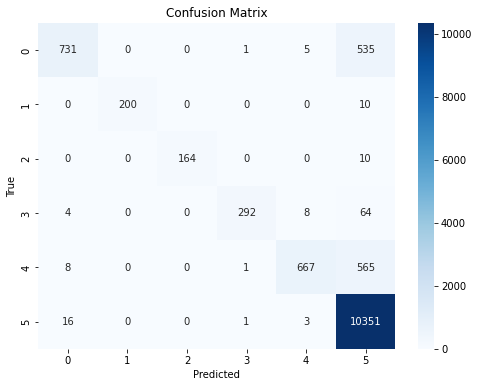

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_train,y_train_xgb_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2','3','4','5'], yticklabels=['0', '1', '2','3','4','5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
y_predict_xgb=clf.predict(X_test)
result_xgb = pd.DataFrame({
    'ID': [x for x in range(1, len(y_test) + 1)],
    'Rating': y_predict_xgb
})
result_xgb.to_csv('xgbclassifier.csv',index=False)

# RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rndclf=RandomForestClassifier(n_estimators=300,n_jobs=-1)
rndclf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [52]:
y_predict_rnd_train=rndclf.predict(X_train)
accuracy_score(y_predict_rnd_train,y_train)

1.0

In [53]:
f1_score(y_predict_rnd_train,y_train,average='weighted')

1.0

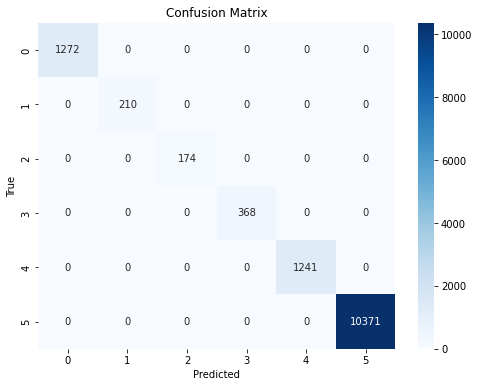

In [54]:
cm_rnd=confusion_matrix(y_train,y_predict_rnd_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnd, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2','3','4','5'], yticklabels=['0', '1', '2','3','4','5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
y_predict_rnd=rndclf.predict(X_test)
result_rnd = pd.DataFrame({
    'ID': [x for x in range(1, len(y_test) + 1)],
    'Rating': y_predict_rnd
})
result_rnd.to_csv('randomforestclassifier.csv',index=False)